## This notebook solves a simplified version of Huggett (1996) model using Dolo.

This is a heterogeneous-agent overlapping generations model where each period agents are hit with idiosyncratic income shocks $y_t$ that follow an $AR1$ process. Also, each period, agents die with probability $\tau$, and at age $T$, agents die with certainty.  There are incomplete markets and agents only have access to a risk-free asset $s_t$ that pays $(1+r)s_t$ next period, where $r$ is the interest rate.

The value function for an agent with current assets $s$ and current income $y$ is: $v(y,s)=\max_{c,s'} u(c)+\beta \mathbf{E}v(y',s')$ where the expectation is taken over the value of the income shock and the probability of dying.

The agent's budget constraint is: $c+s'=(1+r)s+y$ where s' is his asset choice next period. The agent will also be subject to a borrowing constraint: $s'\geq \bar{s}$.

Here, we define the control in the model as $a=s'-s$, i.e. $a$ is the change in assets.


#### Some notes on the solution method:

The solution method is almost identical to Huggett (1993) except that we have an additional exogenous process, $t$, for keeping track of whether an agent is alive or not (if $t=1$, the agent is alive). $t$ follows a Markov Process. To illustrate, let us suppose an agent can live for three periods at most, and each period he has a probability $\tau$ of dying. Then, the set of values for $t$ is $[1, 1,1,0]$ and the transition matrix for $t$ is:

\begin{bmatrix}
    0     & 1-\tau  & 0 & \tau \\
    0       & 0 & 1-\tau  & \tau \\
    0       & 0  & 0 & 1\\
    0       & 0 & 0 & 1\\
\end{bmatrix}



In [22]:
# importing packages
# First import the packages
Pkg.dir("Dolo")
import Dolo
using AxisArrays
using PyPlot

In [23]:
# get the model file
filename=("Huggett1996_processes.yaml")

"Huggett1996_processes.yaml"

In [24]:
model=Dolo.yaml_import(filename)

name,Huggett 1996
filename,Huggett1996_processes.yaml
Type,Equation
value,\[V_{t} = \frac{\left(c_{t}\right)^{\left(1-\sigma\right)}}{\left(1-\sigma\right)}+\beta V_{t+1}\]
expectation,\[m_{t} = \frac{\beta}{\left(c_{t+1}\right)^{\sigma}} 1+r\]
felicity,\[u_{t} = \frac{\left(c_{t}\right)^{\left(1-\sigma\right)}}{\left(1-\sigma\right)}\]
transition,\[s_{t} = a_{t-1}+s_{t-1}\]
arbitrage,\[\left(1-\beta \left(\frac{c_{t}}{c_{t+1}}\right)^{\sigma} 1+r\right) \left(1-t_{t}\right)+t_{t} \left(10000-c_{t}\right)\]


In [25]:
pp= model.exogenous

Model


Dolo.ProductProcess(Dolo.VAR1([0.0],[0.75],[0.01]),Dolo.DiscreteMarkovProcess(,[1.0 0.0 … 0.0 0.0; 0.02 0.0 … 0.0 0.0; … ; 0.02 0.0 … 0.0 0.98; 1.0 0.0 … 0.0 0.0],[0.0 1.0; 1.0 0.0; … ; 7.0 0.0; 8.0 0.0]))

In [26]:
Dolo.discretize(pp.process_1)

Dolo.UnstructuredGrid


Dolo.DiscretizedProcess{Dolo.CartesianGrid}(,Array{Float64,2}[
[-0.512476; -0.362341; … ; -0.0912161; 0.0589183],

[-0.399086; -0.248952; … ; 0.0221733; 0.172308],

[-0.285697; -0.135563; … ; 0.135563; 0.285697],

[-0.172308; -0.0221733; … ; 0.248952; 0.399086],

[-0.0589183; 0.0912161; … ; 0.362341; 0.512476]],Array{Float64,1}[[0.0112574,0.222076,0.533333,0.222076,0.0112574],[0.0112574,0.222076,0.533333,0.222076,0.0112574],[0.0112574,0.222076,0.533333,0.222076,0.0112574],[0.0112574,0.222076,0.533333,0.222076,0.0112574],[0.0112574,0.222076,0.533333,0.222076,0.0112574]])

In [27]:
pp.process_2.values

Dolo.CartesianGrid


9×2 Array{Float64,2}:
 0.0  1.0
 1.0  0.0
 2.0  0.0
 3.0  0.0
 4.0  0.0
 5.0  0.0
 6.0  0.0
 7.0  0.0
 8.0  0.0

In [28]:
pp.process_2.transitions

9×9 Array{Float64,2}:
 1.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0 
 0.02  0.0  0.98  0.0   0.0   0.0   0.0   0.0   0.0 
 0.02  0.0  0.0   0.98  0.0   0.0   0.0   0.0   0.0 
 0.02  0.0  0.0   0.0   0.98  0.0   0.0   0.0   0.0 
 0.02  0.0  0.0   0.0   0.0   0.98  0.0   0.0   0.0 
 0.02  0.0  0.0   0.0   0.0   0.0   0.98  0.0   0.0 
 0.02  0.0  0.0   0.0   0.0   0.0   0.0   0.98  0.0 
 0.02  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.98
 1.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0 

In [29]:
dp = Dolo.discretize( model.exogenous)
dp1 = Dolo.discretize(Dolo.MarkovChain, model.exogenous.process_1)

dp2 = model.exogenous.process_2

Dolo.DiscreteMarkovProcess(,[1.0 0.0 … 0.0 0.0; 0.02 0.0 … 0.0 0.0; … ; 0.02 0.0 … 0.0 0.98; 1.0 0.0 … 0.0 0.0],[0.0 1.0; 1.0 0.0; … ; 7.0 0.0; 8.0 0.0])

In [30]:
dp1.transitions

Dolo.UnstructuredGrid


3×3 Array{Float64,2}:
 0.765625  0.21875  0.015625
 0.109375  0.78125  0.109375
 0.015625  0.21875  0.765625

In [31]:
dp.values

27×3 Array{Float64,2}:
 -0.213809  0.0  1.0
  0.0       0.0  1.0
  0.213809  0.0  1.0
 -0.213809  1.0  0.0
  0.0       1.0  0.0
  0.213809  1.0  0.0
 -0.213809  2.0  0.0
  0.0       2.0  0.0
  0.213809  2.0  0.0
 -0.213809  3.0  0.0
  0.0       3.0  0.0
  0.213809  3.0  0.0
 -0.213809  4.0  0.0
  ⋮                 
 -0.213809  5.0  0.0
  0.0       5.0  0.0
  0.213809  5.0  0.0
 -0.213809  6.0  0.0
  0.0       6.0  0.0
  0.213809  6.0  0.0
 -0.213809  7.0  0.0
  0.0       7.0  0.0
  0.213809  7.0  0.0
 -0.213809  8.0  0.0
  0.0       8.0  0.0
  0.213809  8.0  0.0

In [32]:
@time sol=Dolo.time_iteration(model, verbose=true, maxit=1000)
dr=sol.dr
@time res = Dolo.time_iteration(model, dr; maxit=200)

------------------------------------------------------------------
It    ηₙ=|xₙ-xₙ₋₁|    λₙ=ηₙ/ηₙ₋₁      Time            Newton steps
------------------------------------------------------------------
0     NaN             NaN             0.00e+00        0    
1     1.70e+01        NaN             4.78e-01        5    
2     1.41e+01        8.28e-01        5.42e-01        10   
3     1.14e+01        8.10e-01        4.36e-01        10   
4     1.80e+01        1.58e+00        6.84e-01        10   
5     4.18e+01        2.32e+00        5.38e-01        10   
6     6.40e+02        1.53e+01        6.20e-01        10   
7     6.53e+02        1.02e+00        4.97e-01        10   
8     2.98e+01        4.55e-02        6.21e-01        10   
9     2.37e+02        7.96e+00        6.10e-01        10   
10    2.29e+02        9.65e-01        5.48e-01        10   
11    1.30e+02        5.70e-01        5.07e-01        10   
12    2.16e+01        1.65e-01        5.70e-01        10   
13    4.23e+01     

Results of Time Iteration Algorithm
 * Complementarities: true
 * Discretized Process type: Dolo.DiscreteMarkovProcess
 * Decision Rule type: Dolo.DecisionRule{Dolo.UnstructuredGrid,Dolo.CartesianGrid}
 * Number of iterations: 1
 * Convergence: true
   * |x - x'| < 1.0e-07: true


Let's look at some consumption policy functions.

In [33]:

drtab = Dolo.tabulate(model, dr, :s) 

# First we have to get the policy functions 
s0 = model.calibration[:states]
dr_ylist=[Dolo.tabulate(model, dr, :s, s0,  y) for y in 4:6] # decision rules across incomes for age 1
ygrid=dp.values[1:3,1] # income values
r=model.calibration.flat[:r]
c_ylist=[exp(ygrid[y])+dr_ylist[y][:s]*r-dr_ylist[y][Axis{:V}(:a)] for y in 1:3]; 

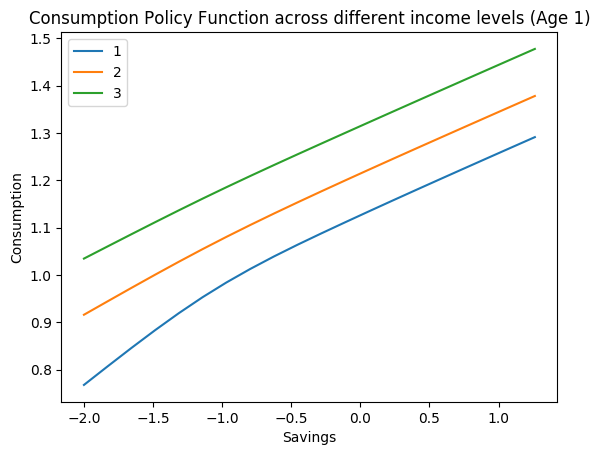

PyObject <matplotlib.text.Text object at 0x00000000049E8668>

In [36]:
# Plot the consumption policy function across different income levels for age 1
import PyPlot
plt=PyPlot
end_y=20

for i=1:3
    plt.plot(dr_ylist[i][Axis{:V}(:s)][1:end_y],c_ylist[i][1:end_y], label=i)
end

plt.legend()
plt.xlabel("Savings")
plt.ylabel("Consumption")
plt.title("Consumption Policy Function across different income levels (Age 1)")

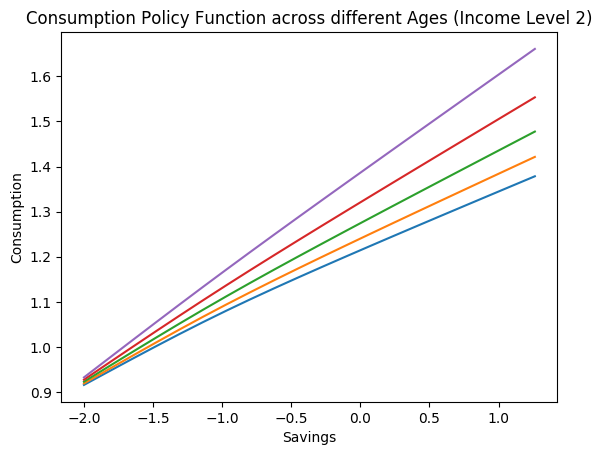

PyObject <matplotlib.text.Text object at 0x0000000004A5D908>

In [37]:
# Plot consumption policy function with different ages (income level 2)
age_vec=[5,8,11,14,17]
dr_ylist=[Dolo.tabulate(model, dr, :s, s0,  y) for y in age_vec] # decision rules across incomes for age 1
r=model.calibration.flat[:r]
inc_level=2

num_aplots=length(age_vec)
dr_alist=[Dolo.tabulate(model, dr, :s, s0, a) for a in age_vec]
c_alist=[exp(ygrid[inc_level])+dr_alist[a][:s]*r-dr_alist[a][Axis{:V}(:a)] for a in 1:num_aplots];

for i=1:num_aplots
    plt.plot(dr_alist[i][Axis{:V}(:s)][1:end_y],c_alist[i][1:end_y], label=i)
end

plt.xlabel("Savings")
plt.ylabel("Consumption")
plt.title("Consumption Policy Function across different Ages (Income Level 2)")